In [1]:
#!/usr/bin/python
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

sns.set_style("ticks")


In [2]:
#first, some numbers

dfi=pd.read_csv('data/sep2023-update/clean1-out.csv')#,index=False) #all data including non-suppress
df = dfi[dfi['co']=='OPH'] #just select OPH for now



OPH all N= 120


/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_13835/2872795078.py:37: RuntimeWarning: Mean of empty slice
  m4[ii]=np.nanmean(tdf['cd4count'])


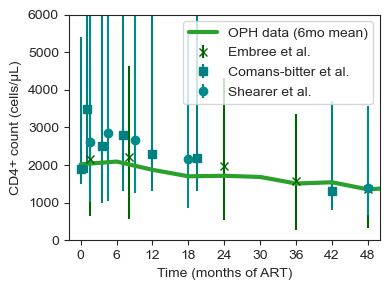

In [4]:
#compare against published CD4 counts data from HIV- kids
plt.figure(figsize=(4,3))

#embree et al.
#tlist = [[0,3],[4,12],24,36,48,60,[72,120]]
tlist_avg = [1.5,8,24,36,48,60,96]
CD4mean=[2164,2201,1972,1564,1361,1225,1310]
CD495lo=[1515,1642,1429,1288,1028,1026,832]
CD495hi=[2493,2418,2345,1792,1827,1356,1488]
plt.errorbar(tlist_avg,CD4mean,yerr=[CD495lo,CD495hi],label='Embree et al.',color='darkgreen',marker='x',ls='')

#comans-bitter et al.
#t = [0,[0.3-2],[2,5],[5,9],[9,15],[15-24],[24,60],[60,120]] 
tlist_avg = [0,1,3.5,7,12,19.5,42,90] 
# (n=20) (n=13) (n=46) (n=105) (n=70) (n=33) (n=33) (n=35) (n=23) (n=51) 
#absolute counts x1e9/L
CD4mean = np.array([1.9, 3.5, 2.5, 2.8, 2.3, 2.2, 1.3, 1.0])*1000 #per µL
#[[0.4,3.5],[1.7,5.3],[1.5,5],[1.5,5.1],[1,4.6],[0.9,5.5],[0.5,2.4],[0.3,2]]
CD495lo = np.array([0.4,1.7,1.5,1.5,1,0.9,0.5,0.3])*1000
CD495hi=np.array([3.5,5.3,5,5.1,4.6,5.5,2.4,2])*1000
plt.errorbar(tlist_avg,CD4mean,yerr=[CD495lo,CD495hi],label='Comans-bitter et al.',color='teal',marker='s',ls='')

#Shearer et al
# 0-3 mo 3-6 mo 6-12 mo 1-2 yr 2-6 yr 6-12 yr 
#(1.60-4.00) (1.80-4.00) (1.40-4.30) (1.30-3.40) (0.70-2.20) (0.65-1.50) (0.53-1.30)
tlist_avg=[1.5,4.5,9,18,48,108]
CD4mean = np.array([2.61, 2.85, 2.67, 2.16, 1.38, 0.98])*1000
CD495lo = np.array([1.6,1.8,1.4,1.3,0.7,0.65])*1000
CD495hi = np.array([4,4,4.3,3.4,2.2,1.5])*1000
plt.errorbar(tlist_avg,CD4mean,yerr=[CD495lo,CD495hi],label='Shearer et al.',color='darkcyan',marker='o',ls='')

#get MEAN data from OPH
m4=np.zeros(13*2); tt=np.arange(13*2)
for ii in range(13*2):

    tdf = df[(df['ART_mo']>ii*6) & (df['ART_mo']<(ii+1)*6)]
    m4[ii]=np.nanmean(tdf['cd4count'])

plt.plot(tt*6,m4,color='tab:green',lw=3,marker='',label='OPH data (6mo mean)')
plt.ylim([0,6000])
plt.xlabel('Time (months of ART)')
plt.ylabel('CD4+ count (cells/µL)')
plt.xticks(np.arange(0,120,6))

plt.legend()
plt.tight_layout()
plt.savefig('figures/CD4counts_HIVneg.pdf',dpi=600)

plt.xlim([-2,50])
plt.savefig('figures/CD4counts_HIVneg-zoom.pdf',dpi=600)
